## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os

## Import Zillow Data

In [2]:
# Load target data
home_prices = pd.read_csv('raw_data/zillow/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')

home_prices.head()

In [17]:
nashville_df = home_prices[(home_prices['City']=="Nashville") & (home_prices['State']=='TN')]
nashville_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109670.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,106734.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
979,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,147818.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
1059,74240,1068,37209,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109565.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
1162,74157,1171,37076,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,111805.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0
1349,74178,1362,37115,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,83431.0,...,221906.0,223547.0,225470.0,227345.0,229725.0,231768.0,233924.0,236437.0,238750.0,240945.0
1935,74238,1951,37207,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,88757.0,...,260175.0,262039.0,264413.0,267231.0,271242.0,275291.0,279386.0,283637.0,287225.0,290689.0
2201,74245,2218,37214,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,90986.0,...,256530.0,258352.0,260171.0,262305.0,264870.0,267812.0,270533.0,273683.0,276198.0,278854.0
2451,74234,2471,37203,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,147659.0,...,434632.0,436116.0,437853.0,440109.0,442457.0,444604.0,446004.0,447759.0,448556.0,449048.0
2621,74248,2645,37217,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,87304.0,...,228782.0,230040.0,231415.0,232757.0,234680.0,236802.0,238992.0,241559.0,243559.0,245680.0


## Import Airbnb Data

In [4]:
listing_files = glob('raw_data/airbnb/listings/*.csv.gz')
listing_files

['raw_data/airbnb/listings\\listings_10_15.csv.gz',
 'raw_data/airbnb/listings\\listings_10_18.csv.gz',
 'raw_data/airbnb/listings\\listings_10_19.csv.gz',
 'raw_data/airbnb/listings\\listings_10_20.csv.gz',
 'raw_data/airbnb/listings\\listings_11_18.csv.gz',
 'raw_data/airbnb/listings\\listings_11_19.csv.gz',
 'raw_data/airbnb/listings\\listings_11_20.csv.gz',
 'raw_data/airbnb/listings\\listings_12_18.csv.gz',
 'raw_data/airbnb/listings\\listings_12_19.csv.gz',
 'raw_data/airbnb/listings\\listings_12_20.csv.gz',
 'raw_data/airbnb/listings\\listings_1_19.csv.gz',
 'raw_data/airbnb/listings\\listings_1_20.csv.gz',
 'raw_data/airbnb/listings\\listings_1_21.csv.gz',
 'raw_data/airbnb/listings\\listings_2_19.csv.gz',
 'raw_data/airbnb/listings\\listings_2_20.csv.gz',
 'raw_data/airbnb/listings\\listings_2_21.csv.gz',
 'raw_data/airbnb/listings\\listings_3_19.csv.gz',
 'raw_data/airbnb/listings\\listings_3_20.csv.gz',
 'raw_data/airbnb/listings\\listings_4_18.csv.gz',
 'raw_data/airbnb/lis

In [121]:
# listing_files_dict = {}
# for filename in listing_files:
#     clean_filename = os.path.basename(filename).replace('.csv', '').replace('.','_').replace('gz','df')
#     filename_df = pd.read_csv(filename, index_col = 0)
#     listing_files_dict[clean_filename] = filename_df

In [132]:
dfs = []
for file in listing_files:
    df = pd.read_csv(file, index_col=0, header=0)
    dfs.append(df)

In [133]:
airbnb_df = pd.concat(dfs, axis=0, ignore_index=True)

In [135]:
#can use last scraped as a proxy for date
airbnb_df.last_scraped.value_counts()

2020-02-22    7574
2020-01-14    7506
2019-11-20    7396
2019-10-18    7371
2019-08-14    7200
              ... 
2020-10-01       1
2019-07-15       1
2020-09-06       1
2019-10-11       1
2021-02-25       1
Name: last_scraped, Length: 77, dtype: int64

In [6]:
listing_files_dict.keys()

dict_keys(['listings_10_15_df', 'listings_10_18_df', 'listings_10_19_df', 'listings_10_20_df', 'listings_11_18_df', 'listings_11_19_df', 'listings_11_20_df', 'listings_12_18_df', 'listings_12_19_df', 'listings_12_20_df', 'listings_1_19_df', 'listings_1_20_df', 'listings_1_21_df', 'listings_2_19_df', 'listings_2_20_df', 'listings_2_21_df', 'listings_3_19_df', 'listings_3_20_df', 'listings_4_18_df', 'listings_4_19_df', 'listings_4_20_df', 'listings_5_18_df', 'listings_5_19_df', 'listings_5_20_df', 'listings_6_15_df', 'listings_6_19_df', 'listings_6_20_df', 'listings_7_18_df', 'listings_7_19_df', 'listings_7_20_df', 'listings_8_18_df', 'listings_8_19_df', 'listings_8_20_df', 'listings_9_16_df', 'listings_9_17_df', 'listings_9_18_df', 'listings_9_19_df', 'listings_9_20_df'])

In [117]:
df_names = [key for key, val in listing_files_dict.items()]
df_names

['listings_10_15_df',
 'listings_10_18_df',
 'listings_10_19_df',
 'listings_10_20_df',
 'listings_11_18_df',
 'listings_11_19_df',
 'listings_11_20_df',
 'listings_12_18_df',
 'listings_12_19_df',
 'listings_12_20_df',
 'listings_1_19_df',
 'listings_1_20_df',
 'listings_1_21_df',
 'listings_2_19_df',
 'listings_2_20_df',
 'listings_2_21_df',
 'listings_3_19_df',
 'listings_3_20_df',
 'listings_4_18_df',
 'listings_4_19_df',
 'listings_4_20_df',
 'listings_5_18_df',
 'listings_5_19_df',
 'listings_5_20_df',
 'listings_6_15_df',
 'listings_6_19_df',
 'listings_6_20_df',
 'listings_7_18_df',
 'listings_7_19_df',
 'listings_7_20_df',
 'listings_8_18_df',
 'listings_8_19_df',
 'listings_8_20_df',
 'listings_9_16_df',
 'listings_9_17_df',
 'listings_9_18_df',
 'listings_9_19_df',
 'listings_9_20_df']

In [116]:
for ind, (key,val) in enumerate(listing_files_dict.items()):
    df_names[

'listings_10_15_df'

In [111]:
listing_files_dict['listings_10_15_df']

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,date
id,,,,,,,,,,,,,,,,,,,,,
5795487,https://www.airbnb.com/rooms/5795487,20151002210713,2015-10-03,Luxurious Cozy Guesthouse Retreat,650 sq ft - completely private & separate from...,NaN,650 sq ft - completely private & separate from...,none,NaN,NaN,...,f,NaN,NaN,f,moderate,f,f,1,3.52,2015-10-01
8082102,https://www.airbnb.com/rooms/8082102,20151002210713,2015-10-03,Jetty's Renaissance Ranch,"Relax in this tranquil, rural, Ranch home Tuck...",Located on a private dead end road; establishe...,"Relax in this tranquil, rural, Ranch home Tuck...",none,"It is very tranquil, Yet a short drive to Nash...",Very quiet the perfect relaxing setting for th...,...,f,NaN,NaN,f,strict,f,f,1,NaN,2015-10-01
2480117,https://www.airbnb.com/rooms/2480117,20151002210713,2015-10-03,Roomy Teal Room,Our beautiful home features the Roomy Teal Roo...,Our space is clean and comfortable. Tracey is ...,Our beautiful home features the Roomy Teal Roo...,none,Tracy (phone number hidden) Live in house manager,NaN,...,f,NaN,NaN,t,strict,f,f,2,3.34,2015-10-01
8291271,https://www.airbnb.com/rooms/8291271,20151002210713,2015-10-03,Private Suite (Apartment style),This is a mother-n-law private suite with full...,The space is over 1000+ sqft. It's a lovely q...,This is a mother-n-law private suite with full...,none,"This is a very established neighborhood, surro...",NaN,...,f,NaN,NaN,f,flexible,f,f,1,NaN,2015-10-01
997187,https://www.airbnb.com/rooms/997187,20151002210713,2015-10-03,2 private rooms in Nashville,"House Rules. 1. No over night quests, or addit...",This is a brand new home and a beautiful place...,"House Rules. 1. No over night quests, or addit...",none,This community is wonderful. It is a very safe...,I do not allow any pets.,...,f,NaN,NaN,f,strict,f,f,1,0.15,2015-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8542398,https://www.airbnb.com/rooms/8542398,20151002210713,2015-10-03,Artsy Full Apt Near Downtown,This full apartment was newly built and design...,NaN,This full apartment was newly built and design...,none,NaN,NaN,...,f,NaN,NaN,f,flexible,f,f,1,NaN,2015-10-01
8445012,https://www.airbnb.com/rooms/8445012,20151002210713,2015-10-03,Private room 12 min from downtown,My cool two bedrooms apt the complex is quite ...,The place is 13 minutes to the airport,My cool two bedrooms apt the complex is quite ...,none,NaN,NaN,...,f,NaN,NaN,t,flexible,f,f,1,NaN,2015-10-01
6300792,https://www.airbnb.com/rooms/6300792,20151002210713,2015-10-03,2BD/2BA 1960's Ranch - Pets Welcome,Whether you are visiting Nashville for the fir...,"We are offering our 2-bedroom, 2-bathroom ranc...",Whether you are visiting Nashville for the fir...,none,Home is nestled on top of a hill. Off street ...,We have a dog that lives on the property but w...,...,f,NaN,NaN,f,moderate,f,f,2,1.83,2015-10-01


In [110]:
listings_10_15_df = listing_files_dict['listings_10_15_df']
listings_10_18_df = listing_files_dict['listings_10_18_df']
listings_10_19_df = listing_files_dict['listings_10_19_df']
listings_10_20_df = listing_files_dict['listings_10_20_df']
listings_11_18_df = listing_files_dict['listings_11_18_df']
listings_11_19_df = listing_files_dict['listings_11_19_df']
listings_11_20_df = listing_files_dict['listings_11_20_df']
listings_12_18_df = listing_files_dict['listings_12_18_df']
listings_12_19_df = listing_files_dict['listings_12_19_df']
listings_12_20_df = listing_files_dict['listings_12_20_df']
listings_01_19_df = listing_files_dict['listings_1_19_df']
listings_01_20_df = listing_files_dict['listings_1_20_df']
listings_01_21_df = listing_files_dict['listings_1_21_df']
listings_02_19_df = listing_files_dict['listings_2_19_df']
listings_02_20_df = listing_files_dict['listings_2_20_df']
listings_02_21_df = listing_files_dict['listings_2_21_df']
listings_03_19_df = listing_files_dict['listings_3_19_df']
listings_03_20_df = listing_files_dict['listings_3_20_df']
listings_04_18_df = listing_files_dict['listings_4_18_df']
listings_04_19_df = listing_files_dict['listings_4_19_df']
listings_04_20_df = listing_files_dict['listings_4_20_df']
listings_05_18_df = listing_files_dict['listings_5_18_df']
listings_05_19_df = listing_files_dict['listings_5_19_df']
listings_05_20_df = listing_files_dict['listings_5_20_df']
listings_06_15_df = listing_files_dict['listings_6_15_df']
listings_06_19_df = listing_files_dict['listings_6_19_df']
listings_06_20_df = listing_files_dict['listings_6_20_df']
listings_07_18_df = listing_files_dict['listings_7_18_df']
listings_07_19_df = listing_files_dict['listings_7_19_df']
listings_07_20_df = listing_files_dict['listings_7_20_df']
listings_08_18_df = listing_files_dict['listings_8_18_df']
listings_08_19_df = listing_files_dict['listings_8_19_df']
listings_08_20_df = listing_files_dict['listings_8_20_df']
listings_09_16_df = listing_files_dict['listings_9_16_df']
listings_09_17_df = listing_files_dict['listings_9_17_df']
listings_09_18_df = listing_files_dict['listings_9_18_df']
listings_09_19_df = listing_files_dict['listings_9_19_df']
listings_09_20_df = listing_files_dict['listings_9_20_df']


In [123]:
airbnb_list = [listings_10_15_df,listings_10_18_df,listings_10_19_df,
               listings_10_20_df,listings_11_18_df,listings_11_19_df,
               listings_11_20_df,listings_12_18_df,listings_12_19_df,
               listings_12_20_df,listings_01_19_df,listings_01_20_df,
               listings_01_21_df,listings_02_19_df,listings_02_20_df,
               listings_02_21_df,listings_03_19_df,listings_03_20_df,
               listings_04_18_df,listings_04_19_df,listings_04_20_df,
               listings_05_18_df,listings_05_19_df,listings_05_20_df,
               listings_06_15_df,listings_06_19_df,listings_06_20_df,
               listings_07_18_df,listings_07_19_df,listings_07_20_df,
               listings_08_18_df,listings_08_19_df,listings_08_20_df,
               listings_09_16_df,listings_09_17_df,listings_09_18_df,
               listings_09_19_df,listings_09_20_df]

In [8]:
listings_2_21_df.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
6422,https://www.airbnb.com/rooms/6422,20210219004252,2021-02-20,Nashville Charm,30 day or more rental during COVID. Show COVID...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/pro_photo_too...,12172,https://www.airbnb.com/users/show/12172,Michele,...,10.0,10.0,10.0,NaN,f,1,0,1,0,4.69
25613,https://www.airbnb.com/rooms/25613,20210219004252,2021-02-20,Room in Historic East Nashville Craftsman Home,Serve up some sweet sounds on the piano and wi...,This home is in a walkable neighborhood with i...,https://a0.muscache.com/pictures/60aa90fe-1b3f...,95811,https://www.airbnb.com/users/show/95811,Nell,...,10.0,10.0,10.0,NaN,t,1,0,1,0,3.87
136015,https://www.airbnb.com/rooms/136015,20210219004252,2021-02-20,Apart. on the Ridge near Opryland,Fantastic View! Overlooks farms and is on the ...,Dead end street with great neighbors!,https://a0.muscache.com/pictures/2739438/005be...,666322,https://www.airbnb.com/users/show/666322,Dave And Peggy,...,10.0,10.0,10.0,NaN,f,2,2,0,0,0.43
258817,https://www.airbnb.com/rooms/258817,20210219004252,2021-02-20,ButterflyRoom-private bath- open Jan 26,Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/eef19bc4-2743...,22296,https://www.airbnb.com/users/show/22296,Diana,...,10.0,9.0,9.0,NaN,f,7,0,6,1,0.86
289242,https://www.airbnb.com/rooms/289242,20210219004252,2021-02-20,"MorningstarHouse, monthly room- open Feb 2",Morningstar House! Extended stay - price reduc...,The Morningstar House is in a quiet cul-de-sac...,https://a0.muscache.com/pictures/40a7ab72-20f7...,22296,https://www.airbnb.com/users/show/22296,Diana,...,9.0,9.0,9.0,NaN,f,7,0,6,1,0.68


In [9]:
listings_2_21_df.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated',

In [7]:
reviews_df = pd.read_csv('raw_data/airbnb/reviews_2_21.csv.gz', compression='gzip')
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...


In [8]:
reviews_df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...
...,...,...,...,...,...,...
332595,48095829,731963419,2021-02-16,376650335,Nathaniel,Very cute
332596,48095943,731999187,2021-02-16,43224485,Brody,The property is not safe. Not only did 2 of th...
332597,48108210,731238971,2021-02-14,125188375,Rachel,Host was extremely sweet and replied almost in...
332598,48130048,731602541,2021-02-15,383674106,Gage,"good spot, clean rooms, kind staff"


In [9]:
calendar_df = pd.read_csv('raw_data/airbnb/calendar_2_21.csv.gz', compression='gzip')
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6422,2021-02-20,f,$40.00,$40.00,30.0,365.0
1,6422,2021-02-21,f,$40.00,$40.00,30.0,365.0
2,6422,2021-02-22,f,$40.00,$40.00,30.0,365.0
3,6422,2021-02-23,f,$40.00,$40.00,30.0,365.0
4,6422,2021-02-24,f,$40.00,$40.00,30.0,365.0


In [10]:
calendar_df

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6422,2021-02-20,f,$40.00,$40.00,30.0,365.0
1,6422,2021-02-21,f,$40.00,$40.00,30.0,365.0
2,6422,2021-02-22,f,$40.00,$40.00,30.0,365.0
3,6422,2021-02-23,f,$40.00,$40.00,30.0,365.0
4,6422,2021-02-24,f,$40.00,$40.00,30.0,365.0
...,...,...,...,...,...,...,...
2242777,48107192,2022-02-16,t,$32.00,$32.00,90.0,365.0
2242778,48107192,2022-02-17,t,$32.00,$32.00,90.0,365.0
2242779,48107192,2022-02-18,t,$32.00,$32.00,90.0,365.0
2242780,48107192,2022-02-19,t,$32.00,$32.00,90.0,365.0


## Clean Zillow Data

In [18]:
nashville_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,74101,16,37013,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109670.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,106734.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
979,74252,988,37221,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,147818.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
1059,74240,1068,37209,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,109565.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
1162,74157,1171,37076,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,111805.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0


In [67]:
nashville_prices_df = nashville_df.drop(columns=['RegionID', 'SizeRank', 'RegionType', 
                                                 'StateName', 'State', 'City', 'Metro', 'CountyName'])

In [68]:
nashville_prices_df.head()

,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
15,37013,109670.0,110113.0,110502.0,111295.0,112128.0,112982.0,113867.0,114736.0,115551.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
23,37211,106734.0,107099.0,107465.0,108224.0,108963.0,109639.0,110367.0,111082.0,111876.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
979,37221,147818.0,148278.0,148776.0,149757.0,150615.0,151485.0,152349.0,153349.0,154261.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
1059,37209,109565.0,109833.0,110119.0,110736.0,111338.0,112027.0,112493.0,113092.0,113650.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
1162,37076,111805.0,112174.0,112465.0,113059.0,113683.0,114306.0,114862.0,115347.0,115830.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0


In [69]:
nashville_prices_df.set_index('RegionName', inplace=True)
nashville_prices_df.head()

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
RegionName,,,,,,,,,,,,,,,,,,,,,
37013,109670.0,110113.0,110502.0,111295.0,112128.0,112982.0,113867.0,114736.0,115551.0,116199.0,...,251507.0,252671.0,253906.0,255162.0,257001.0,259031.0,261394.0,264071.0,266303.0,268556.0
37211,106734.0,107099.0,107465.0,108224.0,108963.0,109639.0,110367.0,111082.0,111876.0,112514.0,...,282124.0,283913.0,285863.0,287953.0,290494.0,293072.0,295822.0,299249.0,302286.0,305349.0
37221,147818.0,148278.0,148776.0,149757.0,150615.0,151485.0,152349.0,153349.0,154261.0,155079.0,...,342198.0,344140.0,345982.0,347992.0,350374.0,352922.0,355478.0,358583.0,361278.0,364051.0
37209,109565.0,109833.0,110119.0,110736.0,111338.0,112027.0,112493.0,113092.0,113650.0,114305.0,...,358643.0,360997.0,363429.0,366379.0,369317.0,372219.0,375011.0,378519.0,380973.0,383138.0
37076,111805.0,112174.0,112465.0,113059.0,113683.0,114306.0,114862.0,115347.0,115830.0,116427.0,...,266134.0,267875.0,269599.0,271444.0,273813.0,276223.0,278581.0,281249.0,283531.0,285977.0


In [70]:
nashville_prices_df = nashville_prices_df.transpose()
nashville_prices_df.head()

RegionName,37013,37211,37221,37209,37076,37115,37207,37214,37203,37217,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,87304.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,87676.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,87963.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,88595.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,89211.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN


In [71]:
nashville_prices_df.reset_index(inplace=True)
nashville_prices_df.head()

RegionName,index,37013,37211,37221,37209,37076,37115,37207,37214,37203,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
0,1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1,1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
2,1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
3,1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
4,1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN


In [72]:
nashville_prices_df['index'] = pd.to_datetime(nashville_prices_df['index'])

In [73]:
nashville_prices_df.head()

RegionName,index,37013,37211,37221,37209,37076,37115,37207,37214,37203,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
0,1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1,1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
2,1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
3,1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
4,1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN


In [75]:
nashville_prices_df.set_index('index', inplace=True)
nashville_prices_df

RegionName,37013,37211,37221,37209,37076,37115,37207,37214,37203,37217,...,37216,37212,37210,37204,37218,37080,37220,37219,37189,37201
index,,,,,,,,,,,,,,,,,,,,,
1996-01-31,109670.0,106734.0,147818.0,109565.0,111805.0,83431.0,88757.0,90986.0,147659.0,87304.0,...,88121.0,124073.0,79652.0,154906.0,96715.0,100882.0,185197.0,NaN,99095.0,NaN
1996-02-29,110113.0,107099.0,148278.0,109833.0,112174.0,83844.0,88978.0,91382.0,148063.0,87676.0,...,88466.0,124773.0,80214.0,155616.0,96743.0,100959.0,185138.0,NaN,99161.0,NaN
1996-03-31,110502.0,107465.0,148776.0,110119.0,112465.0,84214.0,89205.0,91756.0,148532.0,87963.0,...,88751.0,125195.0,80614.0,156426.0,96824.0,101073.0,185521.0,NaN,99564.0,NaN
1996-04-30,111295.0,108224.0,149757.0,110736.0,113059.0,84939.0,89562.0,92508.0,149409.0,88595.0,...,89336.0,126309.0,81281.0,158037.0,97066.0,101279.0,186392.0,NaN,99833.0,NaN
1996-05-31,112128.0,108963.0,150615.0,111338.0,113683.0,85603.0,90104.0,93240.0,151089.0,89211.0,...,89922.0,127568.0,81785.0,159922.0,97800.0,101650.0,187482.0,NaN,100366.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,259031.0,293072.0,352922.0,372219.0,276223.0,231768.0,275291.0,267812.0,444604.0,236802.0,...,353126.0,544627.0,287125.0,649146.0,241525.0,244317.0,561117.0,430796.0,266038.0,383293.0
2020-11-30,261394.0,295822.0,355478.0,375011.0,278581.0,233924.0,279386.0,270533.0,446004.0,238992.0,...,356012.0,546918.0,289395.0,654508.0,242735.0,246970.0,566165.0,430763.0,268952.0,383351.0
2020-12-31,264071.0,299249.0,358583.0,378519.0,281249.0,236437.0,283637.0,273683.0,447759.0,241559.0,...,359699.0,550457.0,292281.0,660564.0,244148.0,249040.0,572388.0,432595.0,271794.0,383955.0


<AxesSubplot:xlabel='index'>

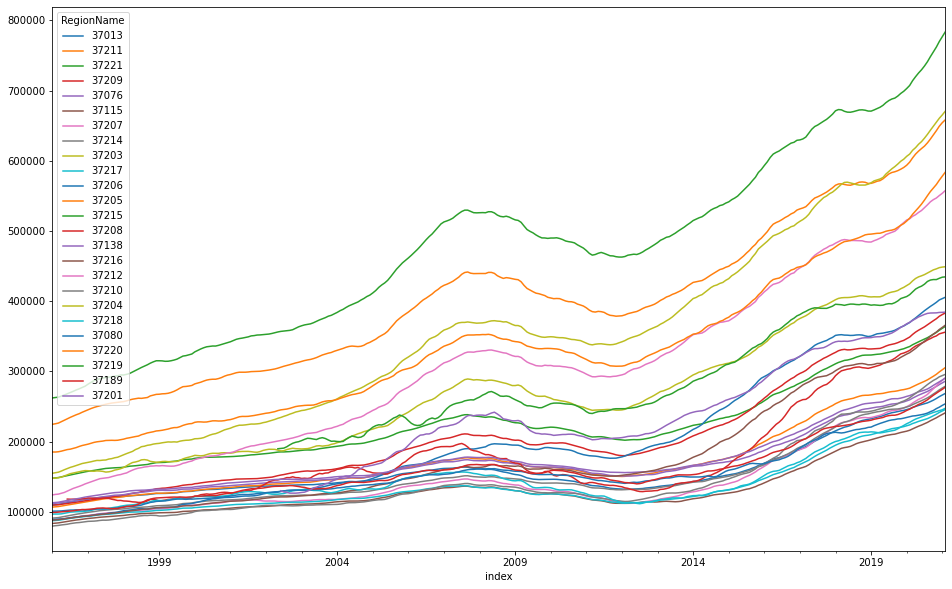

In [78]:
nashville_prices_df.plot(figsize = (16,10), subplots=False, legend=True);

## Clean Airbnb Data

In [99]:
# write a function for giving the 
def varname(var, dir=locals()):
    return [ key for key, val in dir.items() if id( val) == id( var)]

In [107]:
# write a function for adding the date to each airbnb
def add_date_col(dataframe):
    string = varname(dataframe)[0]
    month = string[9:11]
    year = string[12:14]
    dataframe['date'] = ('{}/20{}').format(month,year)
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    return dataframe

In [94]:
str('listings_10_15_df')

'listings_10_15_df'

In [106]:
varname(listings_10_15_df)[0]

'listings_10_15_df'

In [109]:
add_date_col(listings_10_15_df)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,date
id,,,,,,,,,,,,,,,,,,,,,
5795487,https://www.airbnb.com/rooms/5795487,20151002210713,2015-10-03,Luxurious Cozy Guesthouse Retreat,650 sq ft - completely private & separate from...,NaN,650 sq ft - completely private & separate from...,none,NaN,NaN,...,f,NaN,NaN,f,moderate,f,f,1,3.52,2015-10-01
8082102,https://www.airbnb.com/rooms/8082102,20151002210713,2015-10-03,Jetty's Renaissance Ranch,"Relax in this tranquil, rural, Ranch home Tuck...",Located on a private dead end road; establishe...,"Relax in this tranquil, rural, Ranch home Tuck...",none,"It is very tranquil, Yet a short drive to Nash...",Very quiet the perfect relaxing setting for th...,...,f,NaN,NaN,f,strict,f,f,1,NaN,2015-10-01
2480117,https://www.airbnb.com/rooms/2480117,20151002210713,2015-10-03,Roomy Teal Room,Our beautiful home features the Roomy Teal Roo...,Our space is clean and comfortable. Tracey is ...,Our beautiful home features the Roomy Teal Roo...,none,Tracy (phone number hidden) Live in house manager,NaN,...,f,NaN,NaN,t,strict,f,f,2,3.34,2015-10-01
8291271,https://www.airbnb.com/rooms/8291271,20151002210713,2015-10-03,Private Suite (Apartment style),This is a mother-n-law private suite with full...,The space is over 1000+ sqft. It's a lovely q...,This is a mother-n-law private suite with full...,none,"This is a very established neighborhood, surro...",NaN,...,f,NaN,NaN,f,flexible,f,f,1,NaN,2015-10-01
997187,https://www.airbnb.com/rooms/997187,20151002210713,2015-10-03,2 private rooms in Nashville,"House Rules. 1. No over night quests, or addit...",This is a brand new home and a beautiful place...,"House Rules. 1. No over night quests, or addit...",none,This community is wonderful. It is a very safe...,I do not allow any pets.,...,f,NaN,NaN,f,strict,f,f,1,0.15,2015-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8542398,https://www.airbnb.com/rooms/8542398,20151002210713,2015-10-03,Artsy Full Apt Near Downtown,This full apartment was newly built and design...,NaN,This full apartment was newly built and design...,none,NaN,NaN,...,f,NaN,NaN,f,flexible,f,f,1,NaN,2015-10-01
8445012,https://www.airbnb.com/rooms/8445012,20151002210713,2015-10-03,Private room 12 min from downtown,My cool two bedrooms apt the complex is quite ...,The place is 13 minutes to the airport,My cool two bedrooms apt the complex is quite ...,none,NaN,NaN,...,f,NaN,NaN,t,flexible,f,f,1,NaN,2015-10-01
6300792,https://www.airbnb.com/rooms/6300792,20151002210713,2015-10-03,2BD/2BA 1960's Ranch - Pets Welcome,Whether you are visiting Nashville for the fir...,"We are offering our 2-bedroom, 2-bathroom ranc...",Whether you are visiting Nashville for the fir...,none,Home is nestled on top of a hill. Off street ...,We have a dog that lives on the property but w...,...,f,NaN,NaN,f,moderate,f,f,2,1.83,2015-10-01


In [ ]:
add_date_col()